In [1]:
import cv2
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn import neural_network
import matplotlib.pyplot as plt 
from sklearn import neural_network
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# def sepia(file_path): 
#     img = Image.open(file_path)
#     width, height = img.size

#     pixels = img.load()

#     for py in range(height):
#         for px in range(width):
#             r, g, b = img.getpixel((px, py))

#             tr = int(0.393 * r + 0.769 * g + 0.189 * b)
#             tg = int(0.349 * r + 0.686 * g + 0.168 * b)
#             tb = int(0.272 * r + 0.534 * g + 0.131 * b)

#             if tr > 255:
#                 tr = 255

#             if tg > 255:
#                 tg = 255

#             if tb > 255:
#                 tb = 255

#             pixels[px, py] = (tr,tg,tb)

#     return img

In [3]:
# data_folder = "./data"
# sepia_folder = "./sepia"
# for filename in os.listdir(data_folder):
#     file_path = os.path.join(data_folder, filename)
#     print(file_path)
#     img = sepia(file_path)
#     sepia_file_path = os.path.join(sepia_folder, filename)
#     print(sepia_file_path)
#     img.save(sepia_file_path)
    
    

0 - normal
1 - sepia

In [4]:
inputs = []
outputs = []

for filename in os.listdir("./data"):
    file_path = os.path.join("./data", filename)
    inputs.append(file_path)
    outputs.append(0)

for filename in os.listdir("./sepia"):
    file_path = os.path.join("./sepia", filename)
    inputs.append(file_path)
    outputs.append(1)

noData = len(inputs)

inputs = np.array(inputs)
outputs = np.array(outputs)

permutation = np.random.permutation(noData)

inputs = inputs[permutation]
outputs = outputs[permutation]

print(inputs)
print(outputs)

['./data/0708.png' './sepia/0002.png' './data/0674.png' ...
 './data/0673.png' './data/0328.png' './sepia/0615.png']
[0 1 0 ... 0 0 1]


In [5]:
import random

def split_data(inputs, outputs):
    indexes = [i for i in range(len(inputs))]

    train_samples = np.random.choice(indexes, int(0.8 * len(inputs)))
    test_samples = [i for i in indexes if not i in train_samples]
    
    random.shuffle(test_samples)

    train_inputs = [inputs[i] for i in train_samples]
    train_outputs = [outputs[i] for i in train_samples]

    test_inputs = [inputs[i] for i in test_samples]
    test_outputs = [outputs[i] for i in test_samples]

    return train_inputs, train_outputs, test_inputs, test_outputs

In [6]:
train_inputs, train_outputs, test_inputs, test_outputs = split_data(inputs, outputs)

In [7]:
def get_parameters(images):
    parameters = []
    for image in images:
        image = Image.open(image)
        # display(image)
        image_parameters = []
        for pixel in list(image.getdata()):
            r, g, b = pixel[:3]  # Extract RGB values
            image_parameters.extend([r, g, b])
        parameters.append(image_parameters)

    return parameters

Iteration 1, loss = 0.68618179
Iteration 2, loss = 0.67546224
Iteration 3, loss = 0.67266669
Iteration 4, loss = 0.66967541
Iteration 5, loss = 0.66576770
Iteration 6, loss = 0.66091063
Iteration 7, loss = 0.65565373
Iteration 8, loss = 0.65162748
Iteration 9, loss = 0.64788102
Iteration 10, loss = 0.64393624
Iteration 11, loss = 0.63953426
Iteration 12, loss = 0.63406266
Iteration 13, loss = 0.62898574
Iteration 14, loss = 0.62360221
Iteration 15, loss = 0.61878234
Iteration 16, loss = 0.61229093
Iteration 17, loss = 0.60761521
Iteration 18, loss = 0.60171637
Iteration 19, loss = 0.59646495
Iteration 20, loss = 0.59095976
Iteration 21, loss = 0.58572492
Iteration 22, loss = 0.58081884
Iteration 23, loss = 0.57700635
Iteration 24, loss = 0.57141090
Iteration 25, loss = 0.56624872
Iteration 26, loss = 0.56122914
Iteration 27, loss = 0.55598840
Iteration 28, loss = 0.55133328
Iteration 29, loss = 0.54675444
Iteration 30, loss = 0.54190903
Iteration 31, loss = 0.53756261
Iteration 32, los

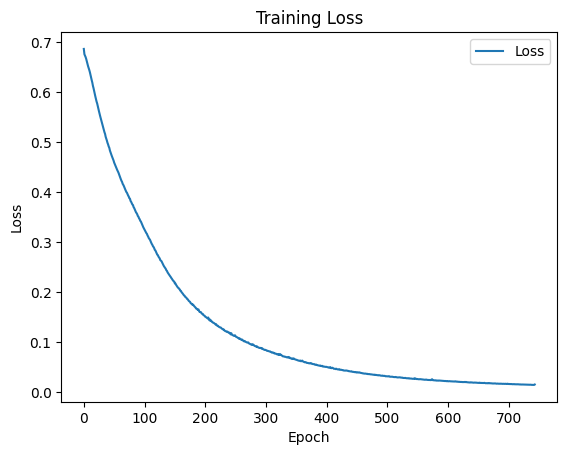

In [8]:
train_inputs = get_parameters(train_inputs)

train_inputs = np.array(train_inputs)
train_outputs = np.array(train_outputs)

test_inputs = np.array(test_inputs)
test_outputs = np.array(test_outputs)

train_inputs = train_inputs / 255.0
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(32,32), activation='relu', max_iter=1000, solver='sgd', verbose=1)
classifier.fit(train_inputs, train_outputs)

predicted = get_parameters(test_inputs)
predicted = np.array(predicted)
predicted = predicted / 255.0
outputs = classifier.predict(predicted)

plt.plot(classifier.loss_curve_, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [9]:
outputs

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

In [10]:
acc = accuracy_score(test_outputs, outputs)
prec = precision_score(test_outputs, outputs, average="weighted")
recall = recall_score(test_outputs, outputs)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")

Accuracy: 0.8772455089820359
Precision: 0.8776150888611113
Recall: 0.8979591836734694
